In [1]:
install.packages("igraph")

package 'igraph' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Zihao\AppData\Local\Temp\RtmpI3A7tu\downloaded_packages


In [3]:
library("igraph")
setwd("C:\\Users\\Zihao\\Desktop\\School\\232e\\Project2")

In [3]:
#18
file_names = list.files("gplus",pattern="*.circles")
ego_nodes = unique(file_names)
count = 0
for (file in ego_nodes){
  filename = paste("gplus/", file, sep="")
  circle_count = readLines(filename)
  if (length(circle_count)>2)
    count = count + 1
}
cat("number of personal networks with more than two circles :", count)

number of personal networks with more than two circles : 57

In [4]:
getel <- function(g,node){
    v = V(g)$name
    elist = c()
    for (i in 1 : (2*length(v))){
        if ( i%%2 == 0 ){
            elist[[i]] = v[[as.numeric(i/2)]]
        }else{
            elist[[i]] = node
        }
    }
    return(unlist(elist))

}

modularity scores of personal network for node 109327480479767108490 0.2527806 


Warning message in xspline(cl$rescoords, shape = shape, open = FALSE, col = col, :
"semi-transparency is not supported on this device: reported only once per page"

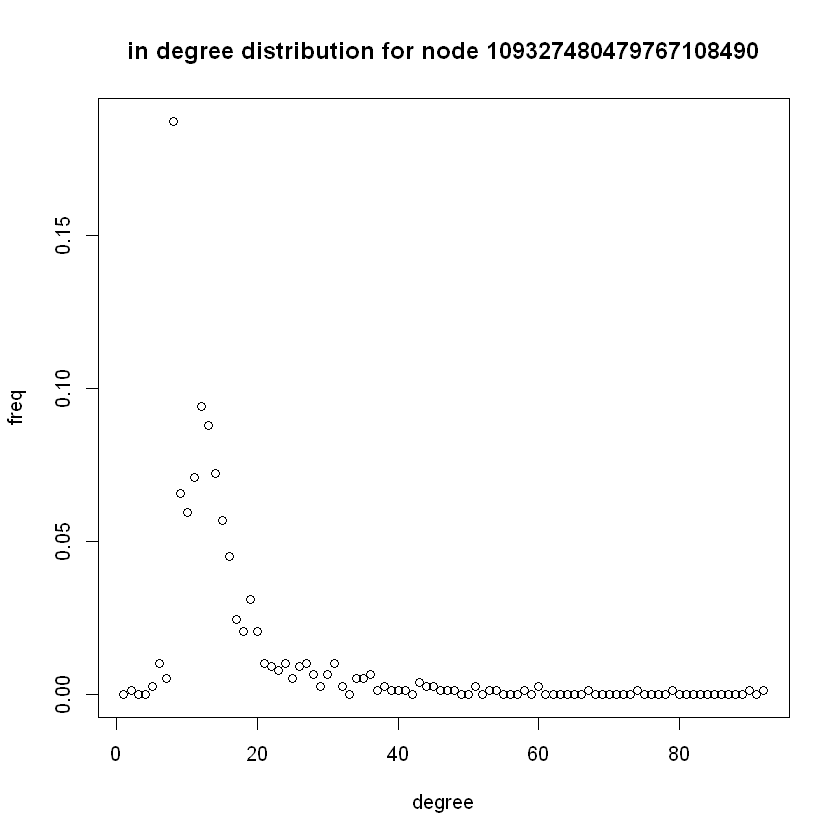

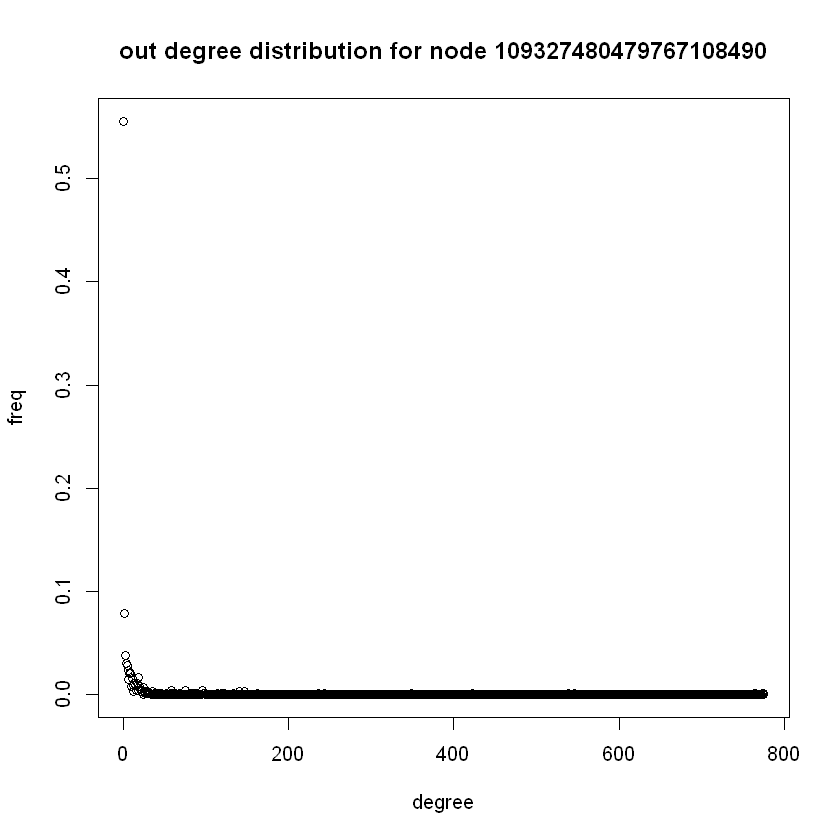

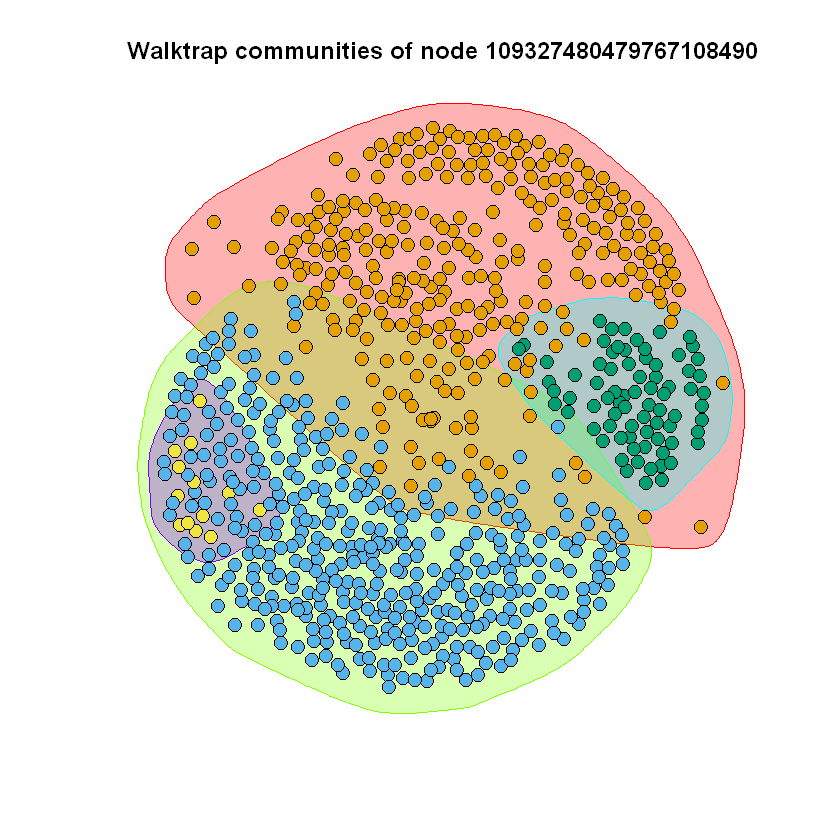

modularity scores of personal network for node 115625564993990145546 0.3194738 


Warning message in xspline(cl$rescoords, shape = shape, open = FALSE, col = col, :
"semi-transparency is not supported on this device: reported only once per page"

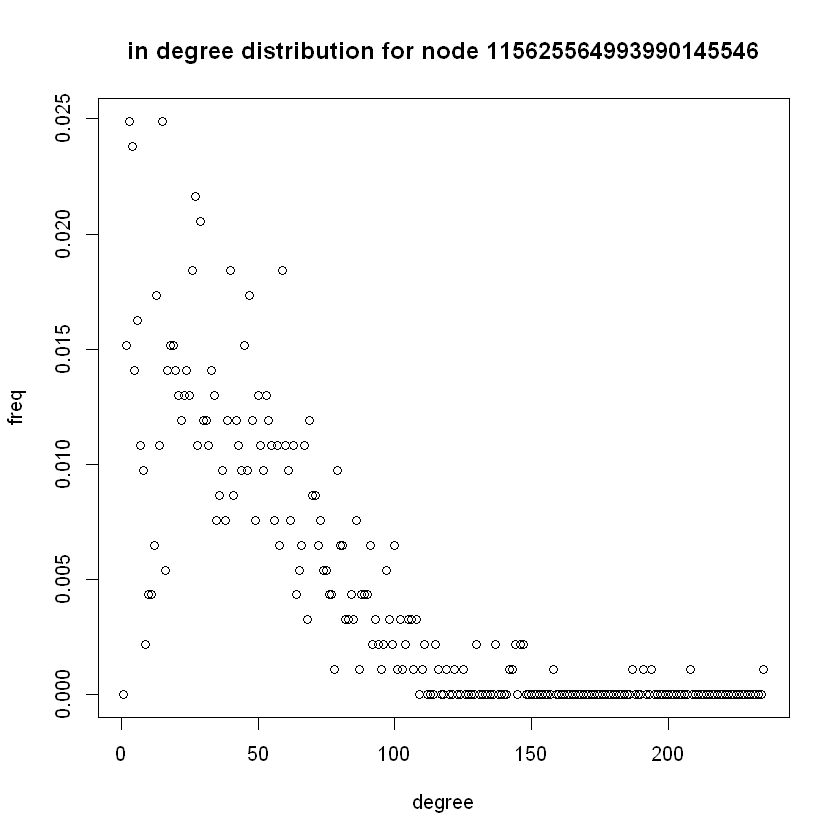

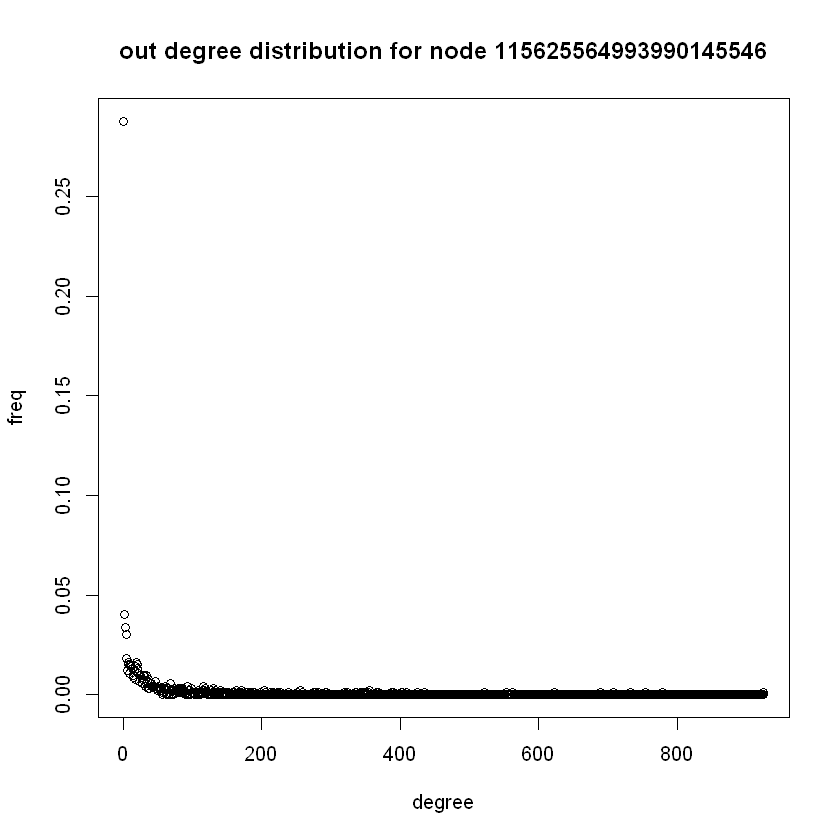

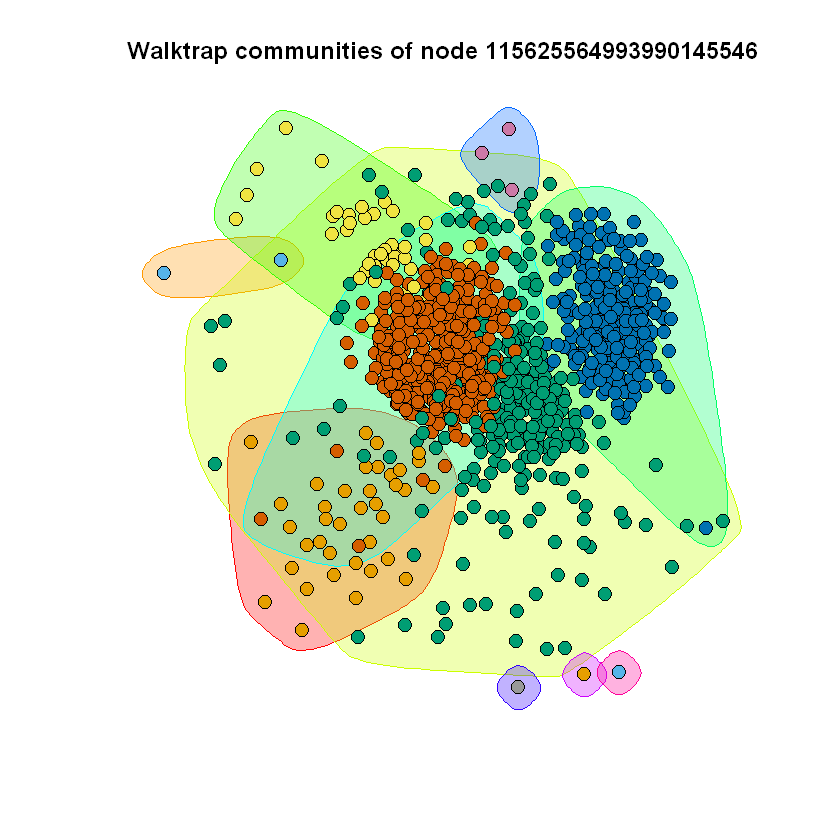

modularity scores of personal network for node 101373961279443806744 0.1910934 


Warning message in xspline(cl$rescoords, shape = shape, open = FALSE, col = col, :
"semi-transparency is not supported on this device: reported only once per page"

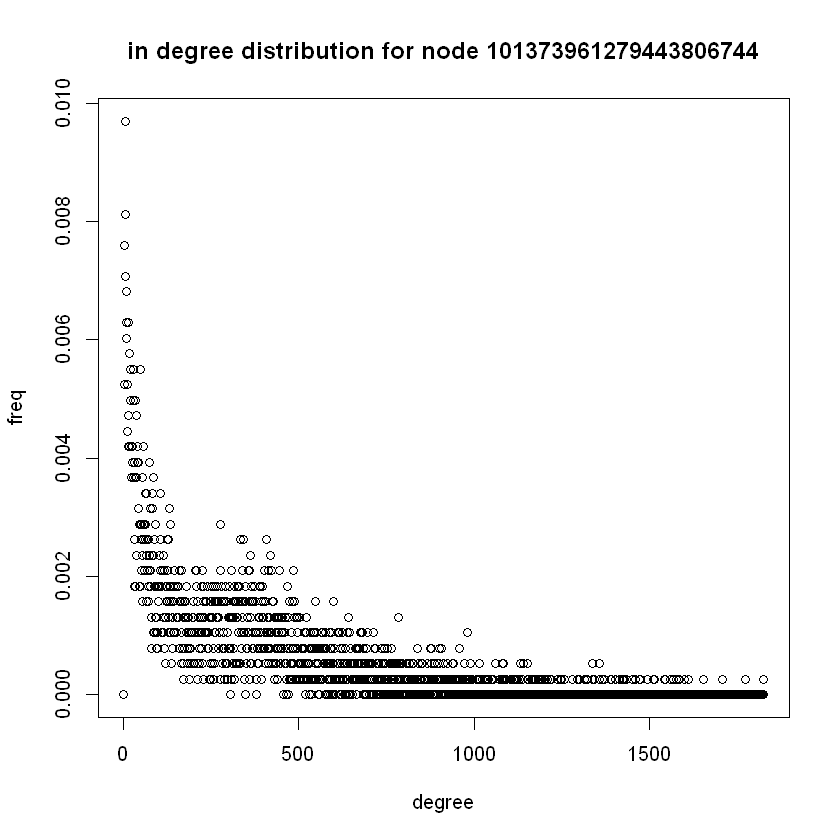

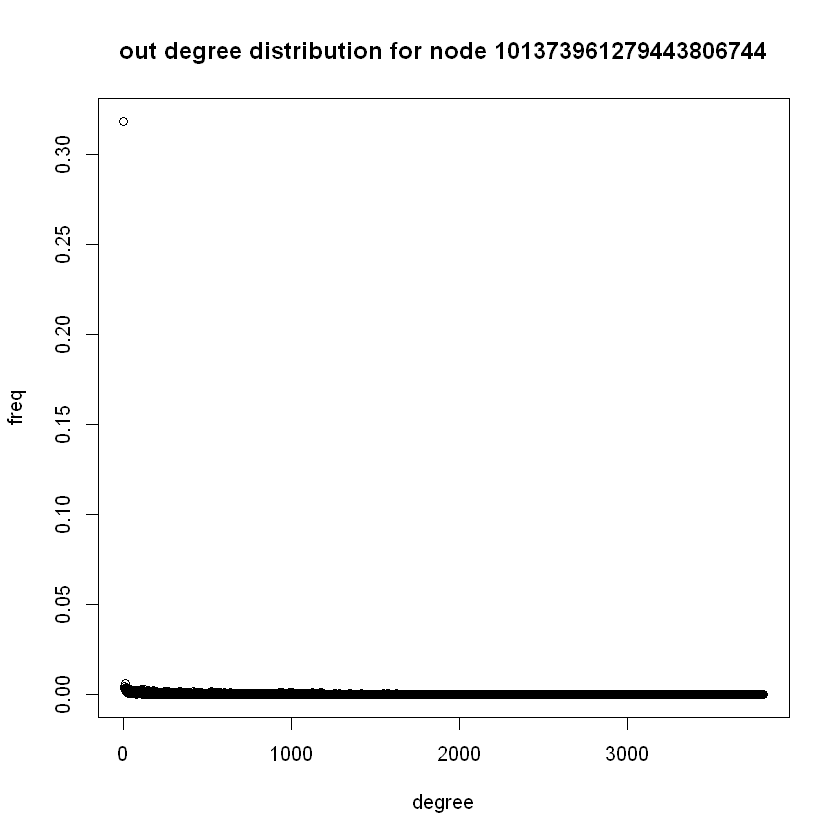

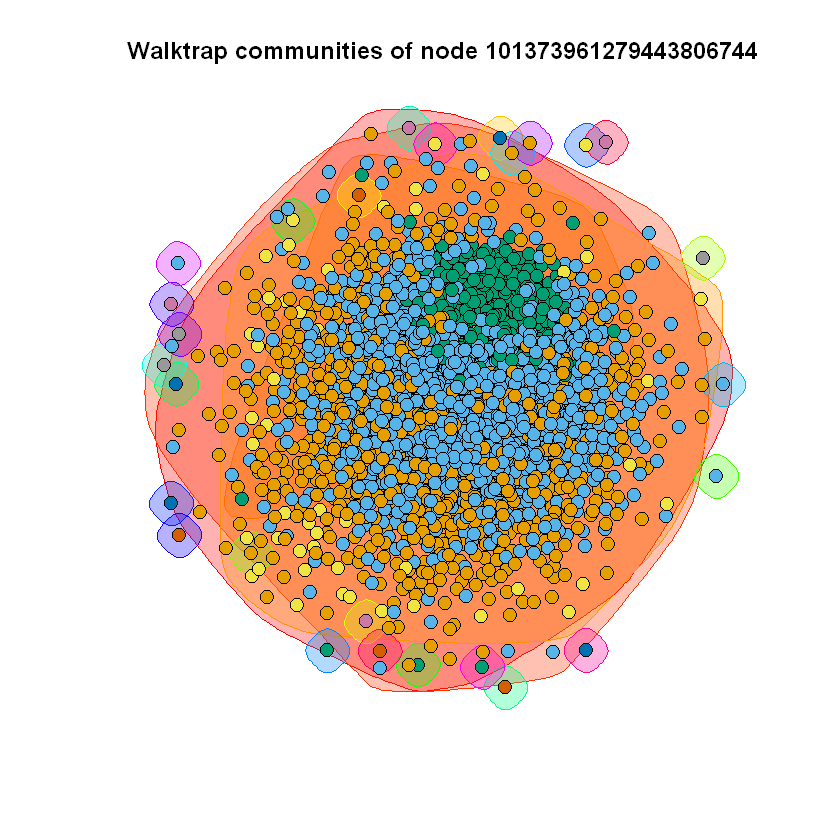

In [5]:
#19&20
Node_idS = c("109327480479767108490", "115625564993990145546", "101373961279443806744")
for (i in 1:length(Node_idS)) {
  g = read_graph(paste("gplus/",Node_idS[i],'.edges',sep=""),format="ncol",directed=TRUE)
  g = g+ vertex(Node_idS[i])

  g = add_edges(g, getel(g,Node_idS[i]))
    
  d_in<-degree.distribution(g,mode="in")
  d_out<-degree.distribution(g,mode="out")
  plot(d_in,xlab="degree",ylab="freq",main=paste("in degree distribution for node ", Node_idS[i], sep=""))
  
  setEPS()
  postscript(paste("in_",i,'.eps',sep=""))
  plot(d_in,xlab="degree",ylab="freq",main=paste("in degree distribution for node ", Node_idS[i], sep=""))
  dev.off()
    
  plot(d_out,xlab="degree",ylab="freq",main=paste("out degree distribution for node ", Node_idS[i], sep=""))
  setEPS()
  postscript(paste("out_",i,'.eps',sep=""))
  plot(d_out,xlab="degree",ylab="freq",main=paste("out degree distribution for node ", Node_idS[i], sep=""))
  dev.off()
    
  walktrap_comm= walktrap.community(g)
  cat(paste("modularity scores of personal network for node ", Node_idS[i], sep=""), modularity(walktrap_comm),"\n")
    
  setEPS()
  postscript(paste("com_",i,'.eps',sep=""))
  plot(walktrap_comm,g, vertex.label=NA, vertex.size=5, edge.lty=0, edge.lable=NA, edge.arrow.mode = 0, main =paste("Walktrap communities of node ", Node_idS[i], sep=""))
  dev.off()
  plot(walktrap_comm,g, vertex.label=NA, vertex.size=5, edge.lty=0, edge.lable=NA, edge.arrow.mode = 0, main =paste("Walktrap communities of node ", Node_idS[i], sep=""))
  }

In [6]:
HandC = function(id){
    g = read_graph(paste("gplus/",id,'.edges',sep=""),format="ncol",directed=TRUE)
    g = g+ vertex(id)
    g = add_edges(g, getel(g,id))
    community= walktrap.community(g)
    
    filename=paste("gplus/", id, ".circles",sep="")
    circle_count = readLines(filename)
    circles = strsplit(circle_count, "[[:space:]]+")
    
  
    number_cir = length(circles)
    number_com = length(community)
        
    circlelist = c()
    for(i in 1:number_cir){
        cicle_mem = unlist(circles[i])[-1]
        circlelist[[i]]= cicle_mem
    }
        
    ai=c()
    for(i in 1:length(circlelist)){
        ai[[i]]= length(circlelist[[i]])
    }
    
    total_membership = membership(community)
   
    b_frame = as.data.frame(table(total_membership[unlist(circlelist)]))
    
    bi = vector(length=number_com)  
    indices = c()
        for (i in b_frame[[1]]) {
            indices = c(indices, as.numeric(i))
        }
    bi[indices] = b_frame[[2]]
  

    N = sum(ai)
    p_ai = ai/N
    p_bi = bi/N  
    

    hk = 0
    for (j in seq(1, number_com)) 
    {
        if (p_bi[j] == 0) #skip zeros
                  {
                      next
                  }
        hk = hk + p_bi[j]*log(p_bi[j])
    }

    A_Matrix = c()
                
    for (i in seq(1, number_cir)) {
        
        community_vector = vector(length=number_com)  
        sub_membership = total_membership[circlelist[[i]]]
        sub_membership = as.data.frame(table(sub_membership))
        indices = c()
        for (i in sub_membership[[1]]) {
            indices = c(indices, as.numeric(i))
        }

        community_vector[indices] = sub_membership[[2]]
        A_Matrix = cbind(A_Matrix, community_vector)
    }
 #print(A_Matrix)

    H_C = -sum(p_ai * log(p_ai))
    H_K = -hk
    H_CK = 0
    H_KC = 0
                
    for (j in seq(1, number_com)) 
    {
        for (i in seq(1, number_cir))
          {
                if (A_Matrix[j, i] == 0)
                  {
                      next
                  }
                H_CK = H_CK + A_Matrix[j, i]/N * log(A_Matrix[j, i]/bi[j])
                H_KC = H_KC + A_Matrix[j, i]/N * log(A_Matrix[j, i]/ai[i])
          }
    }

                
    h = 1 + H_CK/H_C
    c = 1 + H_KC/H_K
    cat('The homogenity score for node ', id,'is ',h,'\n')
    cat('The completeness score for node ', id,'is ',c,'\n')
    Result <- c(h,c)
    return(Result)
}

In [7]:
Node_idS = c("109327480479767108490", "115625564993990145546", "101373961279443806744")
scores = lapply(Node_idS, function(x) HandC(x)) 
#HandC(id)

The homogenity score for node  109327480479767108490 is  0.5249326 
The completeness score for node  109327480479767108490 is  0.5497246 
The homogenity score for node  115625564993990145546 is  0.1060277 
The completeness score for node  115625564993990145546 is  0.3821831 
The homogenity score for node  101373961279443806744 is  0.0003744895 
The completeness score for node  101373961279443806744 is  0.0008590604 
